___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG" width="350px" height="180px" />


# <font color= #8A0829> Data modeling lab </font>
- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year </Strong>: 2023
___

<p style="text-align:right;"> Image from: https://www.freecodecamp.org/news/content/images/2020/08/how-random-forest-classifier-work.PNG</p>

### <font color= #2E9AFE> Tree based models - Classification</font>


### Bosques Aleatorios

Steps:

- Create a bootstrapped dataset with replacemente
- Create a model with each dataset using a random susbset of variables and save the accuracy
- Get back to step 1 and repeat

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import (accuracy_score,precision_score,recall_score)
import time

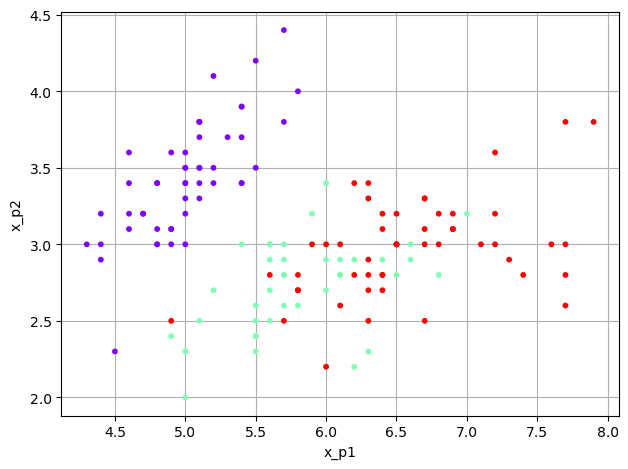

In [3]:
#Import data
iris = datasets.load_iris()
X = iris.data
Y = iris.target

plt.scatter(X[:,0],X[:,1], c=Y, s=10, cmap=plt.cm.rainbow,zorder=2)
plt.xlabel('x_p1')
plt.ylabel('x_p2')
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
X.shape

(150, 4)

In [5]:
from sklearn.model_selection import train_test_split
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [6]:
#%% Model baggin
modelo = RandomForestClassifier(n_estimators=100, #Having a 100 trees could be a clue of overfitting because we only have 150 records in the dataset
                               criterion='gini', 
                               max_depth=10, #depth
                               min_samples_split=2, #Small numbers in this parameter could be an overfitting signal
                               min_samples_leaf=2, # Same here
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=1)

start_time = time.time()
modelo = modelo.fit(X_train,y_train) # Training
print("--- %s seconds ---" % (time.time() - start_time))
Yhat = modelo.predict(X_test) #Prediction

--- 0.050421953201293945 seconds ---


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [7]:
# Performance test
accu = accuracy_score(y_test,Yhat)
prec = precision_score(y_test,Yhat,average='weighted')
reca = recall_score(y_test,Yhat,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 1.000	 1.000	 1.000


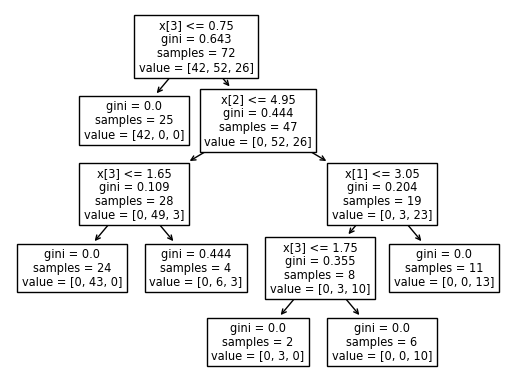

In [10]:
# looking at the first tree
from sklearn import tree
tree.plot_tree(modelo.estimators_[0]) ;

Model is overfitted

In [11]:
# Visual way of adjusting hiperparameters, for when having special requirements of limitations
# we'll train the model with different amount of tre, because we realized that if we use 100 tree it gets overfitted
ntrees = np.arange(1,20,1) # 20 trees maximun
accuracy_s = np.zeros(len(ntrees))
for n in range(len(ntrees)):
    model = RandomForestClassifier(n_estimators=ntrees[n],
                               criterion='gini',
                               max_depth=None,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
    model = model.fit(X_train,y_train)
    accuracy_s[n] = model.score(X_train,y_train)

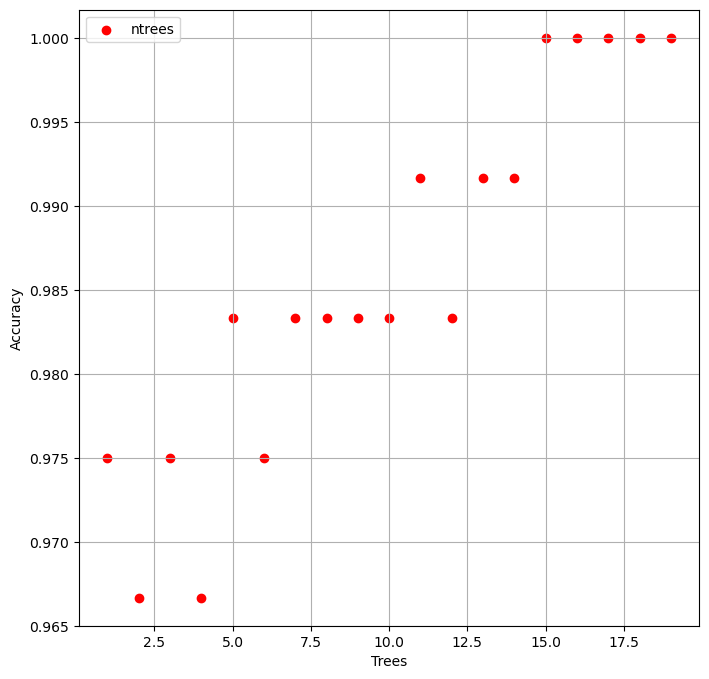

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(ntrees,accuracy_s,c='r',label='ntrees')
plt.ylabel('Accuracy')
plt.xlabel('Trees')
plt.grid()
plt.legend()
plt.show()

In [13]:
#Cross validation and Grid Search
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(criterion='gini',
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 8),
                                'min_samples_split': range(5, 10, 2),
                                'n_estimators': range(2,5,1)}, 
                  cv=10,
                  scoring='accuracy')

gs.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(min_samples_leaf=2,
                                              random_state=0),
             param_grid={'max_depth': range(1, 8),
                         'min_samples_split': range(5, 10, 2),
                         'n_estimators': range(2, 5)},
             scoring='accuracy')

In [14]:
#Optimal hiperparameters
print(gs.best_params_)

{'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 2}


In [16]:
#Model with optimal hiperparameters
new_model = RandomForestClassifier(n_estimators=2,
                               criterion='gini',
                               max_depth=2,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               max_features=None, #'auto'
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
new_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=2, random_state=0)

In [17]:
# Model performance
yhat = new_model.predict(X_test)
accu = accuracy_score(y_test,yhat)
prec = precision_score(y_test,yhat,average='weighted')
reca = recall_score(y_test,yhat,average='weighted')
print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accu,prec,reca))

Accuracy	 Precision	 Recall
 0.967	 0.969	 0.967


In [18]:
# Feature importance
import pandas as pd
feature_imp = pd.Series(new_model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.820882
petal length (cm)    0.179118
sepal length (cm)    0.000000
sepal width (cm)     0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


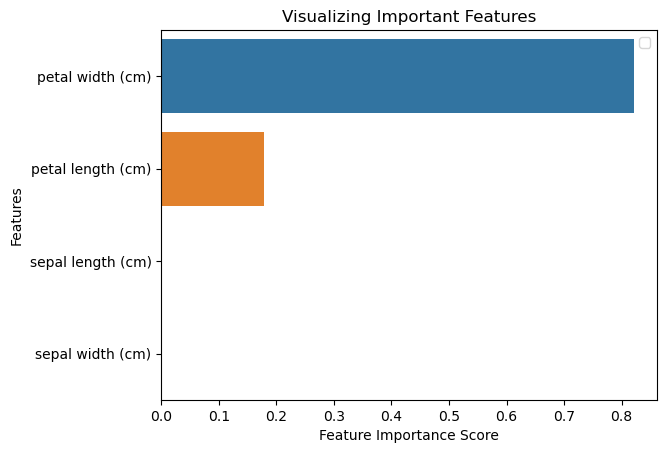

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

**Advantages**

- Good at generalizing
- Can be adjusted to avoid overfitting
- Reduce variance
- Don't need scalling
- No need for null preprocessing
- Don't get affected by outliers


**Disadvantages**

- Complexity. Model creates a lot of trees
- Long training